# Modelos

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [60]:
df = pd.read_csv("../Data/Processed/df_def.csv",parse_dates = ['DateTime'], index_col=["DateTime"])

In [61]:
df_dominio = df.iloc[:, -10:]

In [62]:
df = df.iloc[:, :-11]

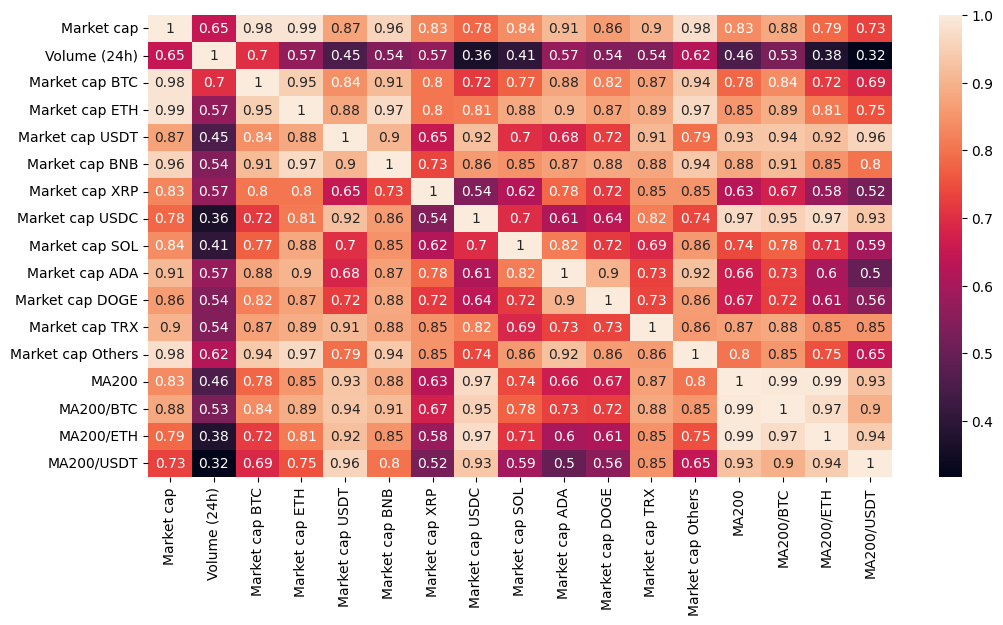

In [63]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),annot=True);

In [64]:
features = df.columns.difference(['DateTime'])
features

Index(['MA200', 'MA200/BTC', 'MA200/ETH', 'MA200/USDT', 'Market cap',
       'Market cap ADA', 'Market cap BNB', 'Market cap BTC', 'Market cap DOGE',
       'Market cap ETH', 'Market cap Others', 'Market cap SOL',
       'Market cap TRX', 'Market cap USDC', 'Market cap USDT',
       'Market cap XRP', 'Volume (24h)'],
      dtype='object')

# Modelos


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [66]:
#X = df.drop('Market cap', axis=1)
X = df[["Market cap","Market cap ETH", "Market cap USDT","Market cap BNB","Market cap ADA","Market cap TRX","Market cap Others"]]
y = df['Market cap BTC']

In [67]:
scaler = StandardScaler()
X_estandarizado = scaler.fit_transform(X)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=10)

# Modelo de Regresión Lineal

In [69]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Mean Squared Error: 6.742460640539982e+19


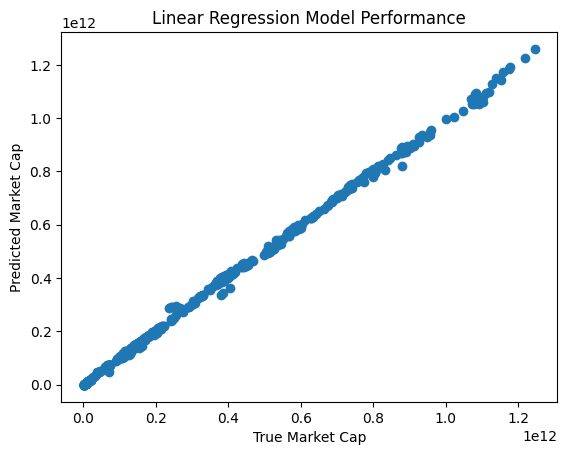

In [70]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


plt.scatter(y_test, model.predict(X_test))
plt.xlabel('True Market Cap')
plt.ylabel('Predicted Market Cap')
plt.title('Linear Regression Model Performance')
plt.show()

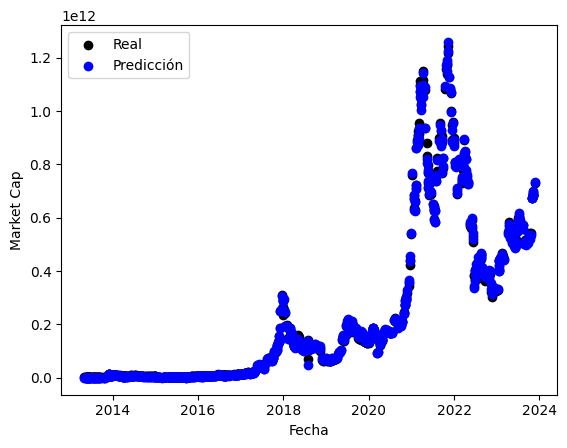

In [71]:
plt.scatter(X_test.index, y_test, color='black', label='Real')
plt.scatter(X_test.index, y_pred, color='blue', label='Predicción')
plt.xlabel('Fecha')
plt.ylabel('Market Cap')
plt.legend()
plt.show()

# Regresión Polinómica

In [72]:
from sklearn.preprocessing import PolynomialFeatures

In [73]:
pol_features = PolynomialFeatures(degree=2)
X_pol = pol_features.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pol, y,
                                                     test_size=0.2,
                                                     random_state=10)

In [74]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Error cuadrático medio:', mse)

Error cuadrático medio: 1.77022144508626e+21


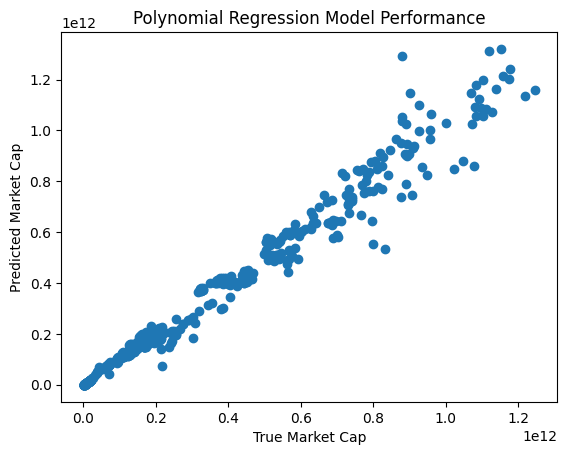

In [75]:
plt.scatter(y_test, model_lr.predict(X_test))
plt.xlabel('True Market Cap')
plt.ylabel('Predicted Market Cap')
plt.title('Polynomial Regression Model Performance')
plt.show()

In [76]:
pol_features = PolynomialFeatures(degree=3)
X_pol = pol_features.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pol, y,
                                                     test_size=0.2,
                                                     random_state=10)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Error cuadrático medio:', mse)

Error cuadrático medio: 8.059776306483701e+22


# Árbol de decisión

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
model_dt = DecisionTreeRegressor() 
model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [79]:
y_pred_dt = model_dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)
print('El error cuadrático medio del modelo Decision Tree Regression es:', mse)

El error cuadrático medio del modelo Decision Tree Regression es: 5.227285485631174e+20


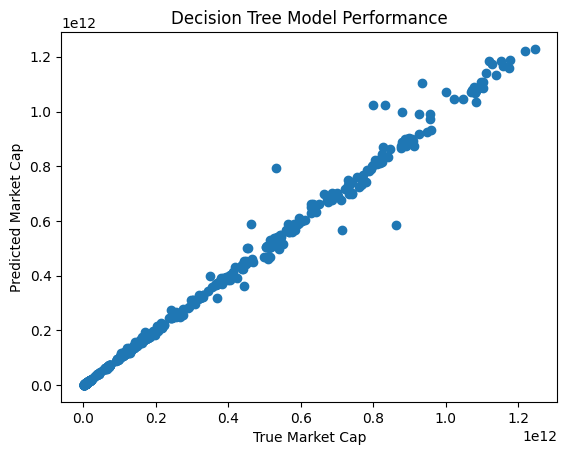

In [80]:
plt.scatter(y_test, model_dt.predict(X_test))
plt.xlabel('True Market Cap')
plt.ylabel('Predicted Market Cap')
plt.title('Decision Tree Model Performance')
plt.show()

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [16,22,26,30],
    'min_samples_split': [5,6,7,8],
    'min_samples_leaf': [2,3,4],
    'max_features': ['auto', 'sqrt', 'log2']}

In [82]:
grid_search = GridSearchCV(model_dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [16, 22, 26, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [5, 6, 7, 8]})

In [83]:
best_params = grid_search.best_params_
print('Los mejores hiperparámetros son:', best_params)

Los mejores hiperparámetros son: {'max_depth': 26, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7}


In [84]:
model_dt_best = DecisionTreeRegressor(**best_params)
model_dt_best.fit(X_train, y_train)
y_pred_dt_best = model_dt_best.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_dt_best)
print('El error cuadrático medio del modelo con los mejores hiperparámetros es:', mse_best)

El error cuadrático medio del modelo con los mejores hiperparámetros es: 3.367161350169445e+20


# Random Forest Regressor

In [85]:
from sklearn.ensemble import RandomForestRegressor

#### Utilizamos los mejores parámetros obtenidos anteriormente

In [86]:
model_rf = RandomForestRegressor(n_estimators=100, max_depth=best_params['max_depth'], 
                                 min_samples_split=best_params['min_samples_split'], 
                                 min_samples_leaf=best_params['min_samples_leaf'], 
                                 max_features=best_params['max_features'], random_state=10)

In [87]:
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('El error cuadrático medio del modelo RandomForest es:', mse_rf)

El error cuadrático medio del modelo RandomForest es: 1.6783859494296863e+20


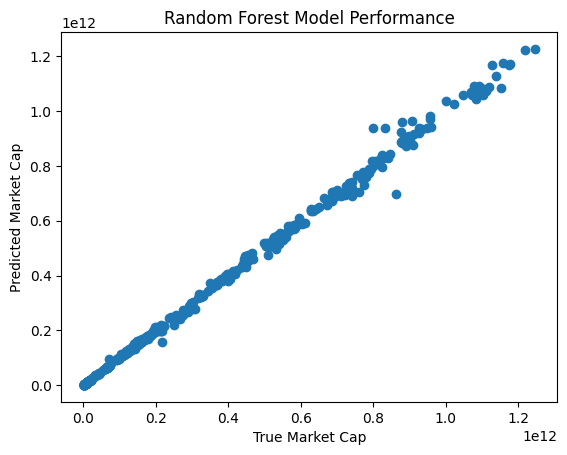

In [88]:
plt.scatter(y_test, model_rf.predict(X_test))
plt.xlabel('True Market Cap')
plt.ylabel('Predicted Market Cap')
plt.title('Random Forest Model Performance')
plt.show()

## Gradient Boosting Regressor

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

In [90]:
gbrt = GradientBoostingRegressor(random_state = 5)
parameters = {'max_depth':[10,15],
              'n_estimators': [100,150],
              'learning_rate': [0.1, 0.01,0.2,0.7,0.9]
}

gbrt = GridSearchCV(gbrt, parameters, scoring='neg_mean_squared_error', cv=5)

gbrt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=5),
             param_grid={'learning_rate': [0.1, 0.01, 0.2, 0.7, 0.9],
                         'max_depth': [10, 15], 'n_estimators': [100, 150]},
             scoring='neg_mean_squared_error')

In [91]:
gbrt.best_estimator_

GradientBoostingRegressor(max_depth=10, n_estimators=150, random_state=5)

In [92]:
y_pred = gbrt.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred)
print('El error cuadrático medio del modelo Gradient Boosting es:', mse_gb)

El error cuadrático medio del modelo Gradient Boosting es: 2.5798486627338027e+20


# Modelo no supervisado

In [93]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [94]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestRegressor())
])
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('classifier', RandomForestRegressor())])

In [95]:
params= {
    'scaler': [StandardScaler(), None],
    'pca__n_components': [3,5,8,10],
    'classifier__max_depth': [10,20,30],
    'classifier__min_samples_leaf': [2,5],

}

In [96]:
gs = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_squared_error')

In [97]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier',
                                        RandomForestRegressor())]),
             param_grid={'classifier__max_depth': [10, 20, 30],
                         'classifier__min_samples_leaf': [2, 5],
                         'pca__n_components': [3, 5, 8, 10],
                         'scaler': [StandardScaler(), None]},
             scoring='neg_mean_squared_error')

In [98]:
gs.best_estimator_

Pipeline(steps=[('scaler', None), ('pca', PCA(n_components=3)),
                ('classifier',
                 RandomForestRegressor(max_depth=30, min_samples_leaf=2))])

In [99]:
y_pred = gs.predict(X_test)

mse_pca = mean_squared_error(y_test, y_pred)
print('El error cuadrático medio del modelo PCA es:', mse_pca)

El error cuadrático medio del modelo PCA es: 1.4717266356306824e+20


### Este modelo aporta resultados mejores que la media de modelos pero no mejor que el Linear Regression

# Arima

In [100]:
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA
from math import sqrt

In [101]:
cap = df[['Market cap']]
cap.head()

,Market cap
DateTime,
2013-04-29,1.583440e+09
2013-04-30,1.610415e+09
2013-05-01,1.637390e+09
2013-05-02,1.456400e+09
2013-05-03,1.275410e+09


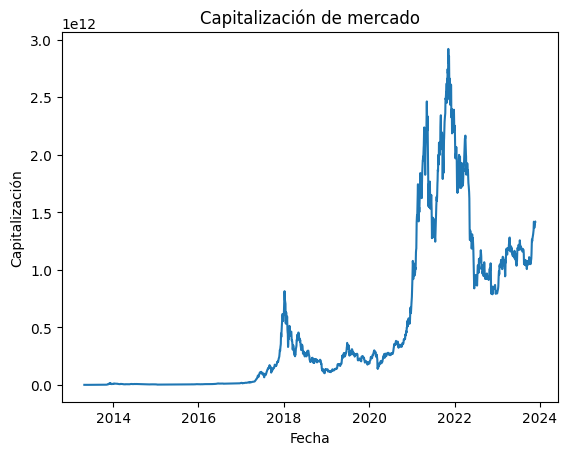

In [102]:
plt.plot(cap)
plt.title('Capitalización de mercado')
plt.xlabel('Fecha')
plt.ylabel('Capitalización')
plt.show()

In [103]:
X = cap['Market cap'].values
train = X[:3000]
test = X[3000:]

In [104]:
len(train)

3000

In [105]:
len(test)

861

In [106]:
model = ARIMA(order=(0,1,0))
model_fit = model.fit(train)

In [107]:
predictions = model.predict(861)
print("mean_squared_error:",(mean_squared_error(test, predictions)))

mean_squared_error: 3.7738555729960526e+23


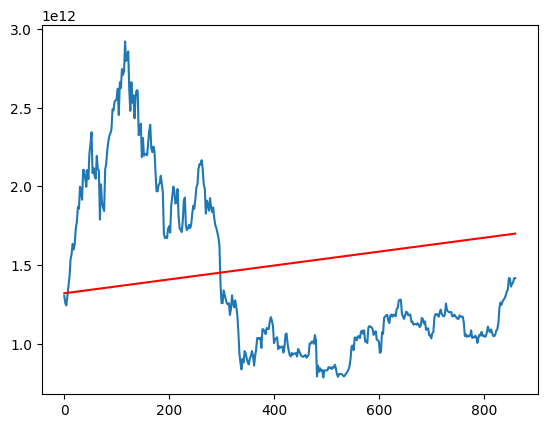

In [108]:
plt.plot(test)
plt.plot(predictions,color='red');

In [109]:
import statsmodels.api as sm

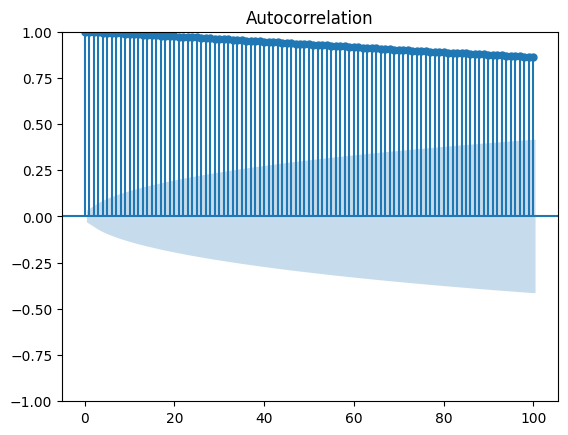

In [110]:
sm.graphics.tsa.plot_acf(cap.values.squeeze(), lags=100)
plt.show()

## Continúo con el Arima anterior, junto con varias variables exógenas

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52001D+01    |proj g|=  1.09890D-01

At iterate    5    f=  2.51068D+01    |proj g|=  1.50733D-02

At iterate   10    f=  2.51009D+01    |proj g|=  3.88904D-04

At iterate   15    f=  2.51008D+01    |proj g|=  5.33689D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     18      1     0     0   5.337D-06   2.510D+01
  F =   25.100772866572971     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


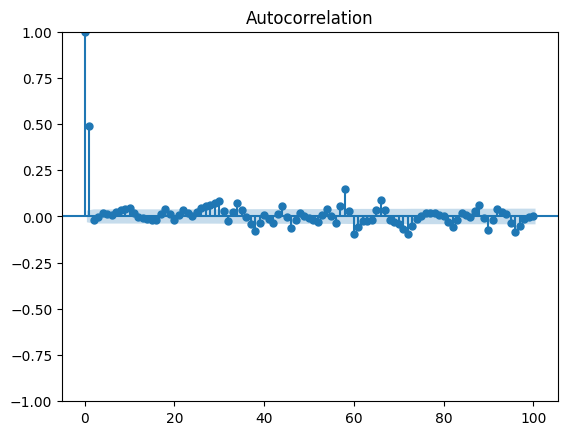

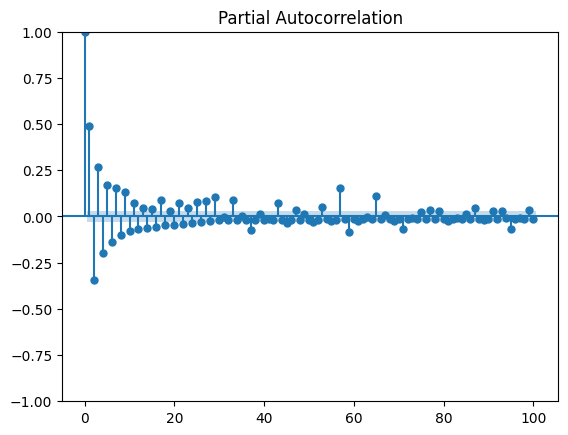

In [111]:
from statsmodels.tsa.api import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

model = SARIMAX(cap, order=(0, 1, 0), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

fig1 = plot_acf(model_fit.resid, lags=100)
fig2 = plot_pacf(model_fit.resid, lags=100)

In [112]:
stepwise_model = auto_arima(train,
                            start_p=1,
                            start_q=1,
                            max_d=3,
                            max_p=5,
                            max_q=5,
                            stationary=False,
                            trace=True,
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=148842.184, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=147797.700, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=148842.956, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=147522.609, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=147429.952, Time=0.21 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=147300.211, Time=0.33 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=147171.826, Time=0.47 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.11 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.64 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=147170.861, Time=0.40 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=147299.835, Time=0.42 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=1.82 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AI

In [113]:
model = ARIMA(order=(5,1,0))
model.fit(train)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3000
Model:               SARIMAX(5, 1, 0)   Log Likelihood              -73578.913
Date:                Thu, 30 Nov 2023   AIC                         147171.826
Time:                        01:09:05   BIC                         147213.869
Sample:                             0   HQIC                        147186.949
                               - 3000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.039e+08   5.04e-14   4.04e+21      0.000    2.04e+08    2.04e+08
ar.L1          0.8356      0.014     61.383      0.000       0.809       0.862
ar.L2         -0.5770      0.014    -40.696      0.0

In [114]:
best_model = ARIMA(order=(5,1,0))
best_model.fit(train)

ARIMA(order=(5, 1, 0))

In [115]:
predictions = best_model.predict(861)
print("mean_squared_error:", mean_squared_error(test, predictions))

mean_squared_error: 3.730522375432904e+23


### Apenas reducimos el error buscando el mejor modelo de ARIMA

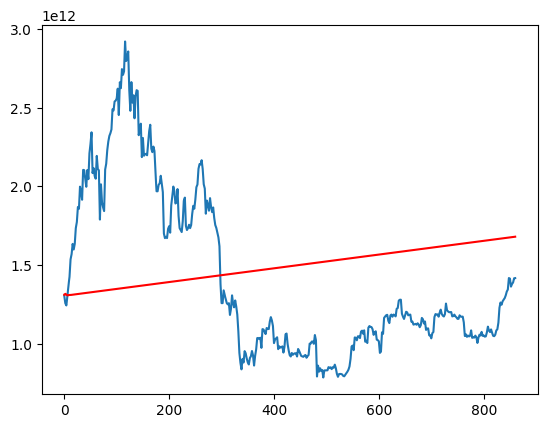

In [116]:
plt.plot(test)
plt.plot(predictions,color='red');

## Regresion no supervisada

In [128]:
series = cap['Market cap'] 
X = series.values.reshape(-1, 1)

model = LinearRegression()

model.fit(X[:-861], X[861:])

predictions = model.predict(X[-861:])

mse = mean_squared_error(X[-861:], predictions)
print('Error cuadrático medio:', mse)

Error cuadrático medio: 5.023986489631061e+22


In [135]:
import numpy as np

In [137]:
predictions.shape

(861, 1)

In [138]:
X_prueba = X[-861:]

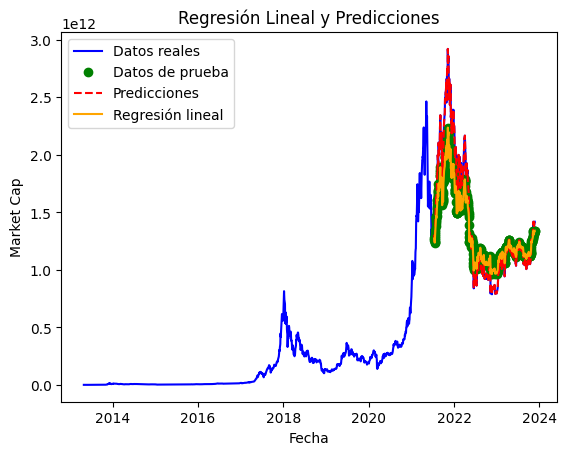

In [145]:
plt.plot(series.index, series.values, label='Datos reales', color='blue')
plt.plot(series.index[-861:], predictions, label='Datos de prueba', marker='o', linestyle='', color='green')
plt.plot(series.index[-861:], X_prueba, label='Predicciones', linestyle='--', color='red')


x_linea = np.array(series.index[-861:])
y_linea = model.predict(X_prueba)
plt.plot(x_linea, y_linea, label='Regresión lineal', linestyle='-', color='orange')

plt.xlabel('Fecha')
plt.ylabel('Market Cap')
plt.title('Regresión Lineal y Predicciones')

plt.legend()
plt.show()

### Este es el modelo no supervisado que necesitamos, aunque es cierto que arrastra bastante error, es menor que el que nos dan los modelos Arima

In [157]:
train = cap.iloc[:-500]

In [158]:
train

,Market cap
DateTime,
2013-04-29,1.583440e+09
2013-04-30,1.610415e+09
2013-05-01,1.637390e+09
2013-05-02,1.456400e+09
2013-05-03,1.275410e+09
...,...
2022-07-07,9.233181e+11
2022-07-08,9.396932e+11
2022-07-09,9.560682e+11


In [159]:
ruta_archivo_csv = 'train.csv'

train.to_csv(ruta_archivo_csv, index=True)

In [160]:
test = cap.iloc[-500:]

In [161]:
ruta_archivo_csv = 'test.csv'

test.to_csv(ruta_archivo_csv, index=True)

In [163]:
train1 = df.iloc[:-500]

In [164]:
ruta_archivo_csv = 'train1.csv'

train1.to_csv(ruta_archivo_csv, index=True)

In [165]:
test1 = df.iloc[-500:]

In [166]:
ruta_archivo_csv = 'test1.csv'

test1.to_csv(ruta_archivo_csv, index=True)

In [ ]:
def main():
    st.title('Aplicación para Visualizar mi Modelo')

    # Cargar y analizar los datos
    data = pd.read_csv('tu_archivo.csv')
    analisis_de_datos(data)

    # Entrenar el modelo
    modelo = entrenar_modelo(data)

    # Mostrar resultados y visualizaciones
    st.write('El modelo predictivo es:', modelo)
    # Aquí puedes agregar más código para mostrar visualizaciones y resultados adicionales

In [ ]:
if __name__ == '__main__':
    main()

In [ ]:
streamlit run app.py